# The code at the top shows sample output of the feature extration funtions for three different numpy arrays at three different times

In [1]:
import cv2
import numpy as np
import prechara_features as pf
import matplotlib.pyplot as plt

In [2]:
def grab_prechara_features(numpy_array):
    im = pf.extract_features(gridToOpenCVImage(numpy_array))
    features_dict = pf.extract_features(getFeatures(im))
    
    return features_dict

In [3]:
num_arr = np.load('32.npz')['arr_0']
pf.extract_features(num_arr)

{'5_num': 1,
 '5_avg_dist': 0.0,
 '5_avg_size': 4.4721360206604,
 '10_num': 1,
 '10_avg_dist': 4.4721360206604,
 'cnt_area_10': 1,
 'cnt_area_100': 1,
 'cnt_perim_10': 1,
 'cnt_perim_20': 1,
 'avg_area_10': 14.0,
 'avg_area_100': 0.0,
 'avg_perim_10': 13.656854152679443,
 'avg_perim_20': 0.0,
 'max_cnt_area': 14.0,
 'max_cnt_perim': 13.656854152679443}

In [4]:
num_arr = np.load('362.npz')['arr_0']
pf.extract_features(num_arr)

{'5_num': 2681,
 '5_avg_dist': 419293.2694657658,
 '5_avg_size': 5.0006728197202355,
 '10_num': 1944,
 '10_avg_dist': 6.143347591774944,
 'cnt_area_10': 961,
 'cnt_area_100': 4,
 'cnt_perim_10': 3447,
 'cnt_perim_20': 2228,
 'avg_area_10': 395.207075962539,
 'avg_area_100': 89755.25,
 'avg_perim_10': 43.86185275329034,
 'avg_perim_20': 59.92836481915984,
 'max_cnt_area': 358661.5,
 'max_cnt_perim': 8753.620068311691}

In [5]:
num_arr = np.load('173.npz')['arr_0']
pf.extract_features(num_arr)

{'5_num': 180,
 '5_avg_dist': 24410.532917085984,
 '5_avg_size': 13.873037740919326,
 '10_num': 159,
 '10_avg_dist': 15.485981746289715,
 'cnt_area_10': 175,
 'cnt_area_100': 88,
 'cnt_perim_10': 466,
 'cnt_perim_20': 379,
 'avg_area_10': 1588.1085714285714,
 'avg_area_100': 3125.4886363636365,
 'avg_perim_10': 136.6213198608595,
 'avg_perim_20': 164.53588788584858,
 'max_cnt_area': 62443.5,
 'max_cnt_perim': 3847.0782078504562}



# Everything below here was just for testing



In [17]:
    # Grabs all contour edges from an image and calculates the perimeter of the contours
    def contour_perim(im, min_perim):
        imOrig = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY);
        ret,thresh = cv2.threshold(imOrig,127,255,0)
        contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[1:]

        cnt_perim = np.array(list(map(lambda x : cv2.arcLength(x,True), contours)))
        cnt_perim_filtered = cnt_perim[cnt_perim > min_perim]
        return cnt_perim_filtered

    # Grabs all contour edges from an image and calculates the area of the contours
    def contour_area(im, min_area):
        imOrig = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY);
        ret,thresh = cv2.threshold(imOrig,127,255,0)
        contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[1:]

        cnt_area = np.array(list(map(lambda x : cv2.contourArea(x), contours)))
        cnt_area_filtered = cnt_area[cnt_area > min_area]
        return cnt_area_filtered

In [5]:
def gridToOpenCVImage(grid):
        # Precharattana Model constants
        CELL_H   = 0
        CELL_A2  = 1
        CELL_A0  = 2
        CELL_A1  = 4
        CELL_D   = 8

        mycmap = {
            CELL_H: [255, 255, 255],
            CELL_A2: [0, 255, 0],
            CELL_A0: [128, 128, 0],
            CELL_A1: [0, 128, 0],
            CELL_D: [0, 0, 0], 
        }

        names = {
            CELL_H: 'Healthy',
            CELL_A2: 'Stage 1 Infected',
            CELL_A0: 'Latent Infected',
            CELL_A1: 'Stage 2 Infected', 
            CELL_D: 'Dead', 
        }
        # Create a L by L by 3 np array
        res = np.zeros([*grid.shape, 3], dtype=np.uint8)

        # trnasform grid into a format with an rgb component
        for row in range(len(grid)):
            for col in range(len(grid[0])):
                # Gets the color in mycmap and reverse it to BGR
                res[row][col] = mycmap[grid[row][col]][::-1]

        return res


[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2. 14.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2

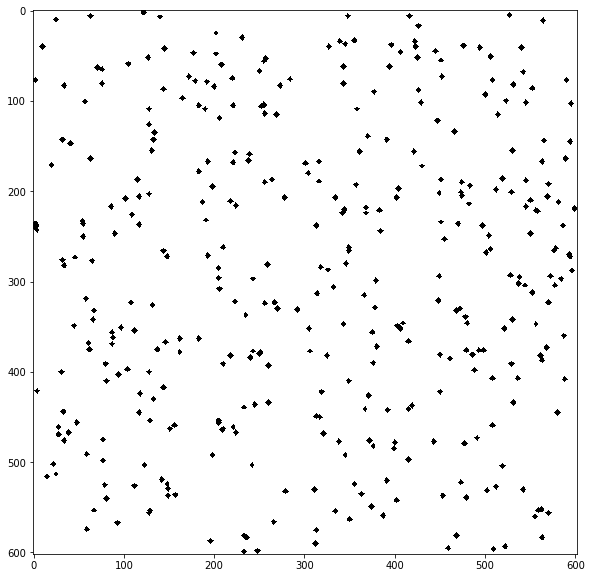

In [9]:
im = gridToOpenCVImage(np.load('32.npz')['arr_0'])

imOrig = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY);
ret,thresh = cv2.threshold(imOrig,127,255,0)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[1:]

cnt_area = np.array(list(map(lambda x : cv2.contourArea(x), contours)))
cnt_area_filtered = cnt_area[cnt_area > 10]
cnt_area_filtered2 = cnt_area[cnt_area > 100]
print(cnt_area)
print(cnt_area_filtered)
print(cnt_area_filtered2)
print(max(cnt_area))
    
im2 = cv2.drawContours(imOrig, contours, -1, (0,255,0), 3)
fig, ax = plt.subplots(figsize=(10, 10))
im = plt.imshow(im2, cmap='gray')

In [23]:
im = gridToOpenCVImage(np.load('32.npz')['arr_0'])
print(contour_perim(im, 20))
print(contour_perim(im, 20) if contour_perim(im, 20).size > 0 else [0])


[]
[0]


In [7]:
min_perim=10
im = gridToOpenCVImage(np.load('32.npz')['arr_0'])
imOrig = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY);
ret,thresh = cv2.threshold(imOrig,127,255,0)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[1:]      # First contour is the whole image, so it is removed

cnt_perim = np.array(list(map(lambda x : cv2.arcLength(x,True), contours)))
cnt_perim_filtered = cnt_perim[cnt_perim > min_perim]
cnt_perim_filtered if cnt_perim_filtered.size > 0 else [0]  


array([13.65685415])

In [19]:
min_area=100

im = gridToOpenCVImage(np.load('32.npz')['arr_0'])
imOrig = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY);
ret,thresh = cv2.threshold(imOrig,127,255,0)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[1:]     # First contour is the whole image, so it is removed

cnt_area = np.array(list(map(lambda x : cv2.contourArea(x), contours)))
cnt_area_filtered = cnt_area[cnt_area > min_area]

print(np.mean(cnt_area_filtered if cnt_area_filtered.size > 0 else [0]))
print(cnt_area_filtered.size > 0)
print(cnt_area_filtered)
np.mean(cnt_area_filtered)

0.0
False
[]


nan